# List Statistical about Autonomous Vehicles
## Manuel Robalinho
## 2018/09

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
path = 'ML/'

In [6]:
# Import file
df = pd.read_excel(path + 'Pesquisa_VATs.xls')


In [7]:
# Example lines
df.head()

,N,Project name,Research_group,Sponsor,Country,Year_Start,Year_end,Navigation speed in standalone mode,Value
0,1,Shakey Vehicle,SRI,SRI,United States,1966,1972.0,NaN,NaN
1,2,Smart Vehicle,Tsukuba Unversity,Tsukuba Unversity,Japan,1977,NaN,Maximum speed of 30 km / h,NaN
2,3,VaMoRs,Bundeswehr Munich University,Bundeswehr Munich University,Germany,1985,NaN,Maximum speed 100 km / h,NaN
3,4,PVS,Nissan and Fujitsu,Nissan,Japan,1987,NaN,Maximum speed 60 km / h,NaN
4,5,VaMP,Bundeswehr Munich University,Bundeswehr Munich University,Germany,1994,NaN,Maximum speed 130 km / h,NaN


In [8]:
# Change columns names
names = df.columns.tolist()
names[names.index('Project name')] = 'Project_name'
df.columns = names
#
df_bk = df.copy()

In [9]:
# Formating Graphics
title_font = fm.FontProperties(family='Arial', style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Arial', style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Arial', style='normal', size=12, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Arial', style='normal', size=11, weight='normal', stretch='normal')

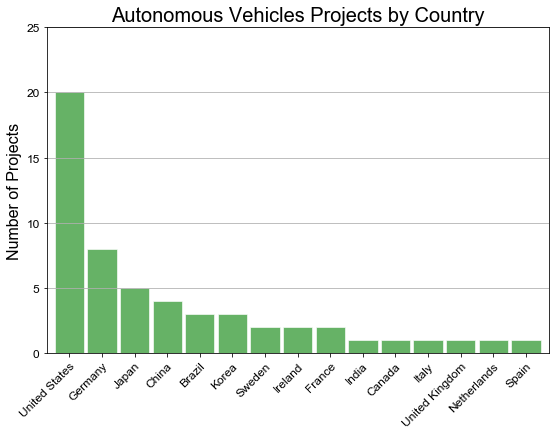

In [10]:
# plot a histogram of the countries  
countdata = df['Country'].value_counts()
ax = countdata.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.9, 
                    alpha=0.6, 
                    color='g',
                    edgecolor='w',
                    grid=False,
                    ylim=[0, 25])

ax.set_xticks(range(len(countdata)))
ax.set_xticklabels(countdata.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Autonomous Vehicles Projects by Country', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of Projects', fontproperties=label_font)

plt.show()

In [11]:
# function to produce more beautiful pie charts with matplotlib
def gbplot_pie(fractions, #values for the wedges
              labels, #labels for the wedges
              title = '', #title of the pie chart
              cm_name = 'Pastel1', #name of the matplotlib colormap to use
              autopct = '%1.1f%%', #format the value text on each pie wedge
              labeldistance = 1.05, #where to place wedge labels in relation to pie wedges
              shadow = True, #shadow around the pie
              startangle = 90, #rotate 90 degrees to start the top of the data set on the top of the pie
              edgecolor = 'w', #color of pie wedge edges
              width = 8, #width of the figure in inches
              height = 8, #height of the figure in inches
              grouping_threshold = None, #group all wedges below this value into one 'all others' wedge
              grouping_label = None): #what the label the grouped wedge
    
    # if the user passed a threshold value, group all fractions lower than it into one 'misc' pie wedge
    if not grouping_threshold==None:
        
        # if user didn't pass a label, apply a default text
        if grouping_label == None:
            grouping_label = 'Others'

        # select the rows greater than the cutoff value
        row_mask = fractions > grouping_threshold
        meets_threshold = fractions[row_mask]

        # group all other rows below the cutoff value
        all_others = pd.Series(fractions[~row_mask].sum())
        all_others.index = [grouping_label]

        # append the grouped row to the bottom of the rows to display
        fractions = meets_threshold.append(all_others)
        labels = fractions.index
    
    # get the color map then pull 1 color from it for each pie wedge we'll draw
    color_map = cm.get_cmap(cm_name)
    num_of_colors = len(fractions)
    colors = color_map([x/float(num_of_colors) for x in range(num_of_colors)])
    
    # create the figure and an axis to plot on
    fig, ax = plt.subplots(figsize=[width, height])
    
    # plot the pie
    wedges = ax.pie(fractions, 
                    labels = labels, 
                    labeldistance = labeldistance,
                    autopct = autopct,
                    colors = colors,
                    shadow = shadow, 
                    startangle = startangle)
    
    # change the edgecolor for each wedge
    for wedge in wedges[0]:
        wedge.set_edgecolor(edgecolor)
    
    # set the title and show the plot
    ax.set_title(title, fontproperties=title_font)
    plt.show()

In [12]:
countdata = df['Country'].value_counts()

In [13]:
countdata

United States     20
Germany            8
Japan              5
China              4
Brazil             3
Korea              3
Sweden             2
Ireland            2
France             2
India              1
Canada             1
Italy              1
United Kingdom     1
Netherlands        1
Spain              1
Name: Country, dtype: int64

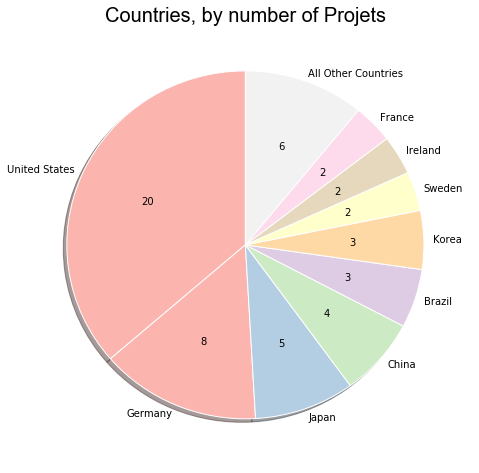

In [14]:
# convert the pie wedge percentage into its absolute value
def my_autopct(pct):
    total = sum(countdata)
    val = int(round(pct*total)/100)
    return '{v:d}'.format(v=val)

gbplot_pie(fractions = countdata,
           labels = countdata.index,
           title = 'Countries, by number of Projets',
           autopct=my_autopct,
           grouping_threshold = 1,         # Number for Others
           grouping_label = 'All Other Countries')

In [15]:
del countdata
countdata = df['Sponsor'].value_counts()

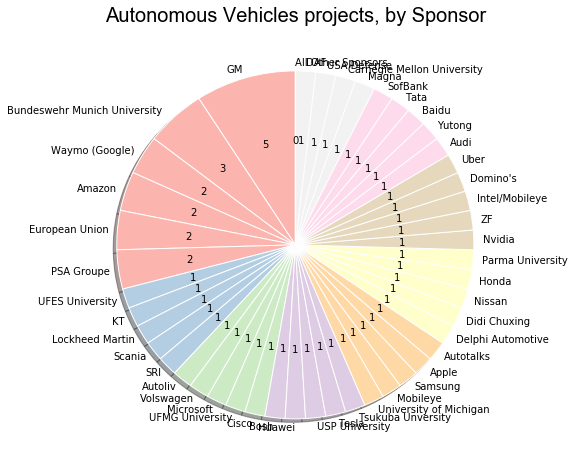

In [16]:
# convert the pie wedge percentage into its absolute value
def my_autopct(pct):
    total = sum(countdata)
    val = int(round(pct*total)/100)
    return '{v:d}'.format(v=val)

gbplot_pie(fractions = countdata,
           labels = countdata.index,
           title = 'Autonomous Vehicles projects, by Sponsor',
           autopct=my_autopct,
           grouping_threshold = 0,         # Number for Others
           grouping_label = 'All Other Sponsors')

In [4]:
# plot the coordinates over a country-level map.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
# https://matplotlib.org/examples/color/named_colors.html

# List of colors
color_list = ['red', 'tomato', 'lightsalmon', 'magenta','deepskyblue','palegreen',
              'plum','cyan', 'darkorange','wheat','seashell', 
              'linen','aliceblue','azure','mintcream', 'oldlace', 
              'floralwhite','honeydew','cornsilk','lightyellow','whitesmoke',
              'lavender','lightcyan','white','ghostwhite','snow',
              'oldlace','oldlace','oldlace','oldlace']

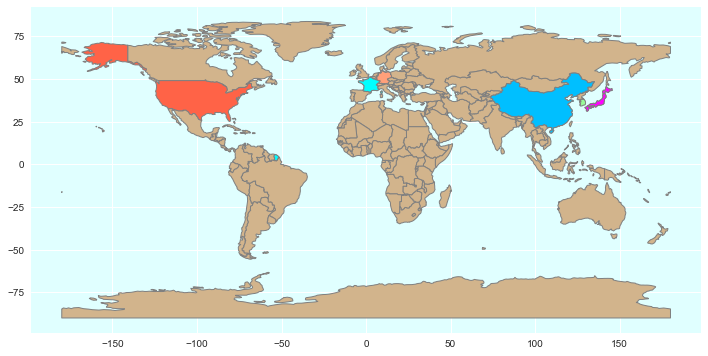

In [6]:
# Plot the Map with most country by projects
# Defining two area to plot
fig, ax = plt.subplots(figsize=(12,6))
water = 'lightcyan'
earth = 'tan'
ax.set_facecolor(water)
world[world['name']!='United States'].\
            plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)
world[world['name']=='United States'].\
           plot(ax=ax, edgecolor='grey', facecolor=color_list[1], linewidth=1, alpha=1)
world[world['name']=='Germany'].\
           plot(ax=ax, edgecolor='grey', facecolor=color_list[2], linewidth=1, alpha=1)    
world[world['name']=='Japan'].\
           plot(ax=ax, edgecolor='grey', facecolor=color_list[3], linewidth=1, alpha=1)     
world[world['name']=='China'].\
           plot(ax=ax, edgecolor='grey', facecolor=color_list[4], linewidth=1, alpha=1)  
world[world['name']=='Korea'].\
           plot(ax=ax, edgecolor='grey', facecolor=color_list[5], linewidth=1, alpha=1) 
world[world['name']=='France'].\
           plot(ax=ax, edgecolor='grey', facecolor=color_list[7], linewidth=1, alpha=1)      
plt.show()

In [20]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [21]:
df['Country'].value_counts()

United States     20
Germany            8
Japan              5
China              4
Brazil             3
Korea              3
Sweden             2
Ireland            2
France             2
India              1
Canada             1
Italy              1
United Kingdom     1
Netherlands        1
Spain              1
Name: Country, dtype: int64

In [22]:
countdata = df['Country'].value_counts()
countdata_2 = countdata.copy()

In [23]:
countdata

United States     20
Germany            8
Japan              5
China              4
Brazil             3
Korea              3
Sweden             2
Ireland            2
France             2
India              1
Canada             1
Italy              1
United Kingdom     1
Netherlands        1
Spain              1
Name: Country, dtype: int64

In [24]:
# Transform table pandas and sort table
s_table = pd.DataFrame(countdata)
# Rename columns
s_table.columns = ['Num_Projects']
s_table['Country'] = s_table.index
s_table

,Num_Projects,Country
United States,20,United States
Germany,8,Germany
Japan,5,Japan
China,4,China
Brazil,3,Brazil
Korea,3,Korea
Sweden,2,Sweden
Ireland,2,Ireland
France,2,France
India,1,India


In [25]:
# join the geodataframe with the cleaned up csv dataframe
merged_2 = world.set_index('name').join(s_table.set_index('Country'))
merged_2.head(10)

,pop_est,continent,iso_a3,gdp_md_est,geometry,Num_Projects
name,,,,,,
Afghanistan,28400000.0,Asia,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",NaN
Angola,12799293.0,Africa,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,NaN
Albania,3639453.0,Europe,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",NaN
United Arab Emirates,4798491.0,Asia,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",NaN
Argentina,40913584.0,South America,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,NaN
Armenia,2967004.0,Asia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,...",NaN
Antarctica,3802.0,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...,NaN
Fr. S. Antarctic Lands,140.0,Seven seas (open ocean),ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48...",NaN
Australia,21262641.0,Oceania,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...,NaN


In [26]:
# Filter some columns from dataframe
merged_3 = merged_2[['continent','Num_Projects','geometry']]
merged_4 = merged_3.sort_values(by=['Num_Projects'],ascending=False)
merged_4.head(25)

,continent,Num_Projects,geometry
name,,,
United States,North America,20.0,"(POLYGON ((-155.54211 19.08348000000001, -155...."
Germany,Europe,8.0,"POLYGON ((9.921906365609232 54.98310415304803,..."
Japan,Asia,5.0,(POLYGON ((134.6384281760039 34.14923371025642...
China,Asia,4.0,(POLYGON ((110.3391878601516 18.67839508714761...
Brazil,South America,3.0,POLYGON ((-57.62513342958296 -30.2162948544542...
Korea,Asia,3.0,"POLYGON ((128.3497164246766 38.61224294692785,..."
France,Europe,2.0,(POLYGON ((-52.55642473001839 2.50470530843705...
Ireland,Europe,2.0,POLYGON ((-6.197884894220991 53.86756500916336...
Sweden,Europe,2.0,"POLYGON ((22.18317345550193 65.72374054632017,..."


In [27]:
# Includind and Index
merged_5 = merged_4.reset_index()
merged_5.head(10)

,name,continent,Num_Projects,geometry
0,United States,North America,20.0,"(POLYGON ((-155.54211 19.08348000000001, -155...."
1,Germany,Europe,8.0,"POLYGON ((9.921906365609232 54.98310415304803,..."
2,Japan,Asia,5.0,(POLYGON ((134.6384281760039 34.14923371025642...
3,China,Asia,4.0,(POLYGON ((110.3391878601516 18.67839508714761...
4,Brazil,South America,3.0,POLYGON ((-57.62513342958296 -30.2162948544542...
5,Korea,Asia,3.0,"POLYGON ((128.3497164246766 38.61224294692785,..."
6,France,Europe,2.0,(POLYGON ((-52.55642473001839 2.50470530843705...
7,Ireland,Europe,2.0,POLYGON ((-6.197884894220991 53.86756500916336...
8,Sweden,Europe,2.0,"POLYGON ((22.18317345550193 65.72374054632017,..."
9,Canada,North America,1.0,(POLYGON ((-63.66449999999998 46.5500099999999...


In [28]:
x1_table =  merged_5.copy()

In [29]:
# Obtain point to the continents - fix only one country by continent to have one unique label
points = world.copy()
# Deleting duplicates countries lines
points = points.drop_duplicates(subset=['continent'], keep='first')
points.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...


In [30]:
# Transform POLYGON to POINT
# copy poly to new GeoDataFrame
#points = merged_5.copy()

# change the geometry
points.geometry = points['geometry'].centroid
# same crs
#points.crs = poly.crs
points.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,POINT (66.08669022192834 33.85639928169076)
1,12799293.0,Africa,Angola,AGO,110300.0,POINT (17.47057255231345 -12.24586903613316)
2,3639453.0,Europe,Albania,ALB,21810.0,POINT (20.03242643144321 41.14135330604877)
4,40913584.0,South America,Argentina,ARG,573900.0,POINT (-65.17536077114174 -35.44682148949509)
6,3802.0,Antarctica,Antarctica,ATA,760.4,POINT (20.57100056984261 -80.49198288284349)


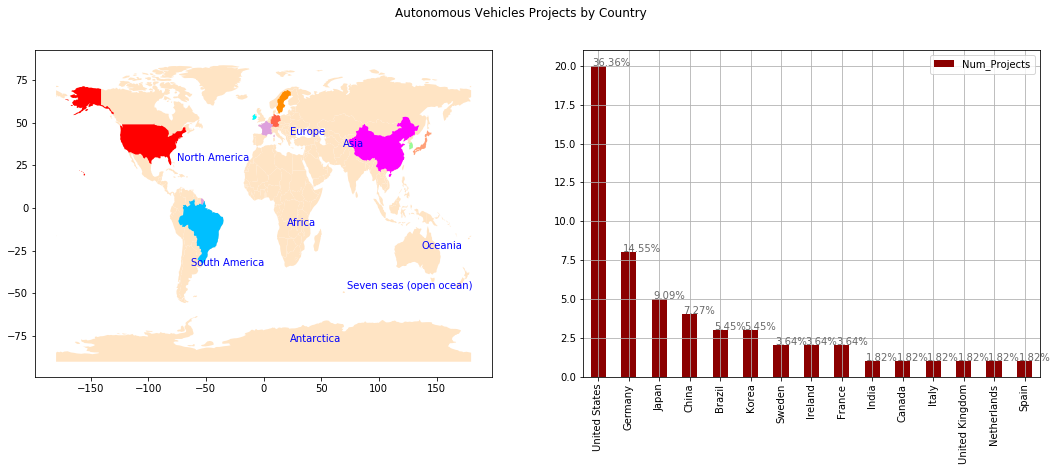

In [31]:
# Plot two Graphs

# Defining two area to plot
f, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(18,6))
ax1.set_axis_on()
f.suptitle('Autonomous Vehicles Projects by Country')

#-- First Graph -----
# PLOT State points
# Plot the states area  
ax1 = x1_table.plot(ax=ax1, facecolor='blue', alpha=1, linewidth=0, color = 'bisque') # cmap='YlOrRd')    cmap=plt.cm.rainbow

for i in np.arange(0, 9):   # Plot 9 registres
    # Changing color for each line
    ax1 = x1_table[x1_table.index == i].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[i])

# Plot the labels - Only the names to the continents
for x, y, label in zip(points.geometry.x, points.geometry.y, points.continent):
    ax1.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='blue')

# ---  Second Graf -----
df = s_table
ax2.set_axis_on()
df.plot(ax=ax2, kind='bar', grid=True, color=('darkred','Green'),fontsize=10)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax2.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list (porcentagem )
for i in ax2.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax2.text(i.get_x()+.05, i.get_height()+.02, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='dimgrey')

In [32]:
# Obtain point to the countries - fix only one country to have one unique label
points_2 = merged_5.copy()

# Filter to countries with projets
points_2 = points_2[points_2.Num_Projects > 0]

# Deleting duplicates countries lines
points_2 = points_2.drop_duplicates(subset=['name'], keep='first')
points_2.head(20)

,name,continent,Num_Projects,geometry
0,United States,North America,20.0,"(POLYGON ((-155.54211 19.08348000000001, -155...."
1,Germany,Europe,8.0,"POLYGON ((9.921906365609232 54.98310415304803,..."
2,Japan,Asia,5.0,(POLYGON ((134.6384281760039 34.14923371025642...
3,China,Asia,4.0,(POLYGON ((110.3391878601516 18.67839508714761...
4,Brazil,South America,3.0,POLYGON ((-57.62513342958296 -30.2162948544542...
5,Korea,Asia,3.0,"POLYGON ((128.3497164246766 38.61224294692785,..."
6,France,Europe,2.0,(POLYGON ((-52.55642473001839 2.50470530843705...
7,Ireland,Europe,2.0,POLYGON ((-6.197884894220991 53.86756500916336...
8,Sweden,Europe,2.0,"POLYGON ((22.18317345550193 65.72374054632017,..."
9,Canada,North America,1.0,(POLYGON ((-63.66449999999998 46.5500099999999...


In [33]:
# change the geometry to point
points_2.geometry = points_2['geometry'].centroid
# same crs
#points.crs = poly.crs
points_2.head(25)

,name,continent,Num_Projects,geometry
0,United States,North America,20.0,POINT (-112.5994383773273 45.70562953540318)
1,Germany,Europe,8.0,POINT (10.28848509274289 51.13372269040782)
2,Japan,Asia,5.0,POINT (138.0649621327077 37.66311081170466)
3,China,Asia,4.0,POINT (103.8836162891887 36.55506853517689)
4,Brazil,South America,3.0,POINT (-53.0543400357671 -10.80677364349892)
5,Korea,Asia,3.0,POINT (127.8213171283307 36.42759860415486)
6,France,Europe,2.0,POINT (-2.880599191403856 42.45771810478766)
7,Ireland,Europe,2.0,POINT (-8.010236544877012 53.18059120995006)
8,Sweden,Europe,2.0,POINT (16.59626584684802 62.81148496808033)
9,Canada,North America,1.0,POINT (-98.14238137209725 61.46907614534906)


In [34]:
# Plot the same MAP with countries

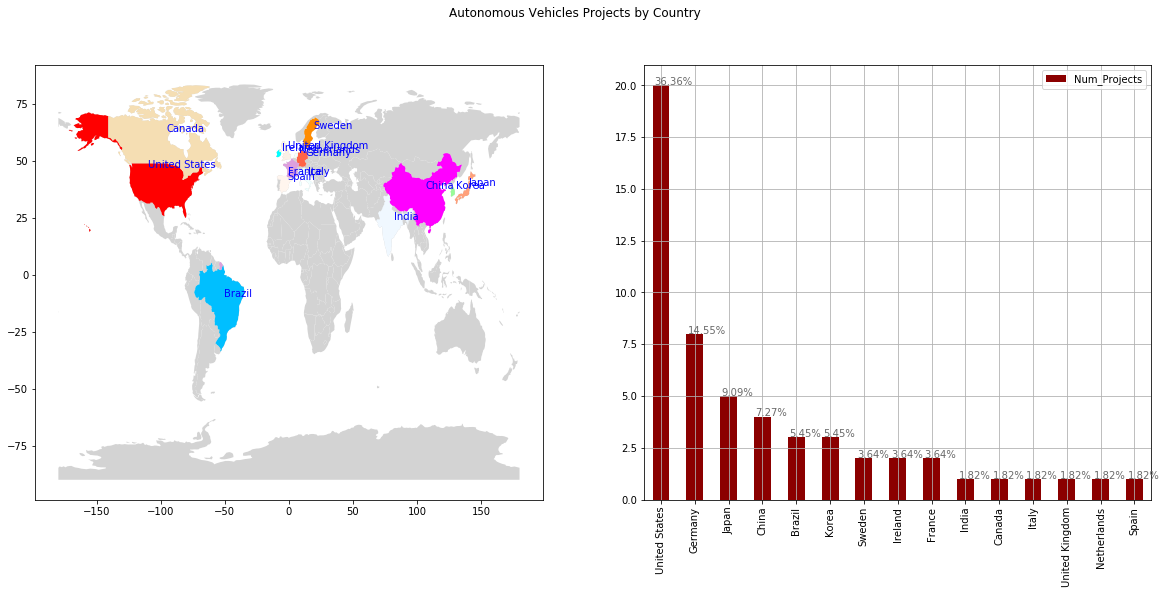

In [35]:
# Plot two Graphs

# Defining two area to plot
f, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(20,8))
ax1.set_axis_on()
f.suptitle('Autonomous Vehicles Projects by Country')

#-- First Graph -----
# PLOT State points
# Plot the states area  
ax1 = x1_table.plot(ax=ax1, facecolor='blue', alpha=1, linewidth=0, color = 'lightgrey', legend = True) # cmap='YlOrRd')    cmap=plt.cm.rainbow

for i in np.arange(0, 15):   # Plot 15 registres
    # Changing color for each line
    ax1 = x1_table[x1_table.index == i].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[i])


# Plot the labels - Only the names to the continents
for x, y, label in zip(points_2.geometry.x, points_2.geometry.y, points_2.name ):
    ax1.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='blue')

# ---  Second Graf -----
df = s_table
ax2.set_axis_on()
df.plot(ax=ax2, kind='bar', grid=True, color=('darkred','Green'),fontsize=10)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax2.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list (porcentagem )
for i in ax2.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax2.text(i.get_x()+.05, i.get_height()+.02, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='dimgrey')

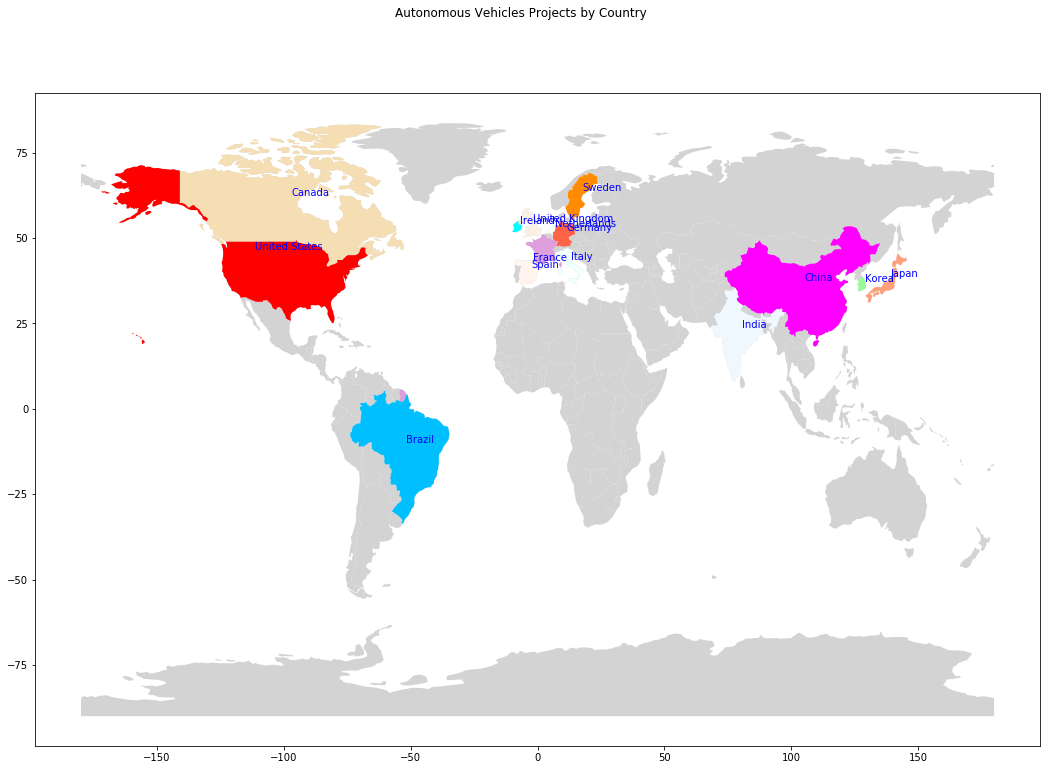

In [36]:
# Plot One MAP

# Defining two area to plot
f, ax1 = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(18,12))
ax1.set_axis_on()
f.suptitle('Autonomous Vehicles Projects by Country')

#-- First Graph -----
# PLOT State points
# Plot the states area  
ax1 = x1_table.plot(ax=ax1, facecolor='blue', alpha=1, linewidth=0, color = 'lightgrey') # cmap='YlOrRd')    cmap=plt.cm.rainbow
for i in np.arange(0, 15):  # Print 15 registres
    # 1 registo
    ax1 = x1_table[x1_table.index == i].plot(ax=ax1,  alpha=1, linewidth=1, color=color_list[i],legend = True)


# Plot the labels - Only the names to the countries
for x, y, label in zip(points_2.geometry.x, points_2.geometry.y, points_2.name):
    ax1.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='blue')


In [38]:
# Find Korea in the MAP
world[world.continent == 'Asia'].head(25)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,2.840000e+07,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
3,4.798491e+06,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
5,2.967004e+06,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
10,8.238672e+06,Asia,Azerbaijan,AZE,77610.0,"(POLYGON ((45.0019873390568 39.7400035670496, ..."
15,1.560509e+08,Asia,Bangladesh,BGD,224000.0,"POLYGON ((92.67272098182556 22.04123891854125,..."
23,3.881900e+05,Asia,Brunei,BRN,20250.0,"POLYGON ((114.2040165548284 4.525873928236805,..."
24,6.911410e+05,Asia,Bhutan,BTN,3524.0,"POLYGON ((91.69665652869668 27.77174184825166,..."
30,1.338613e+09,Asia,China,CHN,7973000.0,(POLYGON ((110.3391878601516 18.67839508714761...
38,2.651000e+05,Asia,N. Cyprus,-99,3600.0,"POLYGON ((32.73178022637745 35.14002594658844,..."
39,5.316400e+05,Asia,Cyprus,CYP,22700.0,"POLYGON ((33.97361657078346 35.058506374648, 3..."


In [39]:
# Find England in the MAP
world[world.continent == 'Europe'].head(25)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."
12,10414336.0,Europe,Belgium,BEL,389300.0,"POLYGON ((3.314971144228537 51.34578095153609,..."
16,7204687.0,Europe,Bulgaria,BGR,93750.0,"POLYGON ((22.65714969248299 44.23492300066128,..."
18,4613414.0,Europe,Bosnia and Herz.,BIH,29700.0,"POLYGON ((19.00548628101012 44.86023366960916,..."
19,9648533.0,Europe,Belarus,BLR,114100.0,"POLYGON ((23.48412763844985 53.91249766704114,..."
28,7604467.0,Europe,Switzerland,CHE,316700.0,"POLYGON ((9.59422610844635 47.52505809182027, ..."
40,10211904.0,Europe,Czech Rep.,CZE,265200.0,"POLYGON ((16.96028812019458 48.5969823268506, ..."
41,82329758.0,Europe,Germany,DEU,2918000.0,"POLYGON ((9.921906365609232 54.98310415304803,..."
43,5500510.0,Europe,Denmark,DNK,203600.0,(POLYGON ((12.69000613775563 55.60999095318078...


In [40]:
points_2

,name,continent,Num_Projects,geometry
0,United States,North America,20.0,POINT (-112.5994383773273 45.70562953540318)
1,Germany,Europe,8.0,POINT (10.28848509274289 51.13372269040782)
2,Japan,Asia,5.0,POINT (138.0649621327077 37.66311081170466)
3,China,Asia,4.0,POINT (103.8836162891887 36.55506853517689)
4,Brazil,South America,3.0,POINT (-53.0543400357671 -10.80677364349892)
5,Korea,Asia,3.0,POINT (127.8213171283307 36.42759860415486)
6,France,Europe,2.0,POINT (-2.880599191403856 42.45771810478766)
7,Ireland,Europe,2.0,POINT (-8.010236544877012 53.18059120995006)
8,Sweden,Europe,2.0,POINT (16.59626584684802 62.81148496808033)
9,Canada,North America,1.0,POINT (-98.14238137209725 61.46907614534906)


In [41]:
df= df_bk.copy()
df.head()

,N,Project_name,Research_group,Sponsor,Country,Year_Start,Year_end,Navigation speed in standalone mode,Value
0,1,Shakey Vehicle,SRI,SRI,United States,1966,1972.0,NaN,NaN
1,2,Smart Vehicle,Tsukuba Unversity,Tsukuba Unversity,Japan,1977,NaN,Maximum speed of 30 km / h,NaN
2,3,VaMoRs,Bundeswehr Munich University,Bundeswehr Munich University,Germany,1985,NaN,Maximum speed 100 km / h,NaN
3,4,PVS,Nissan and Fujitsu,Nissan,Japan,1987,NaN,Maximum speed 60 km / h,NaN
4,5,VaMP,Bundeswehr Munich University,Bundeswehr Munich University,Germany,1994,NaN,Maximum speed 130 km / h,NaN


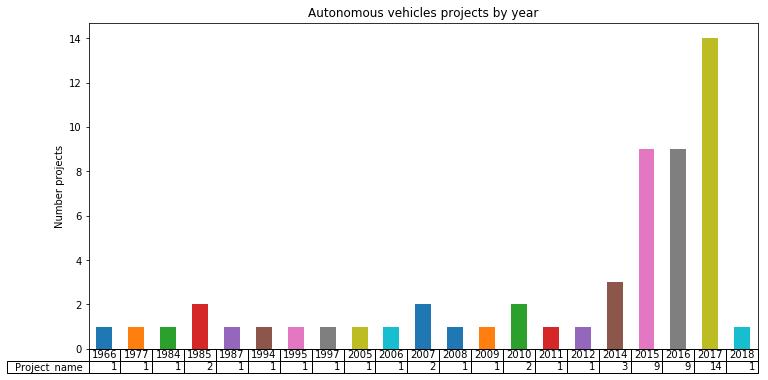

In [42]:
f, ax = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(12,6))
ax = df.groupby('Year_Start')['Project_name'].nunique().plot(kind='bar', table=True)
ax.axes.get_xaxis().set_visible(False)
plt.title('Autonomous vehicles projects by year')
plt.ylabel('Number projects')
plt.show()

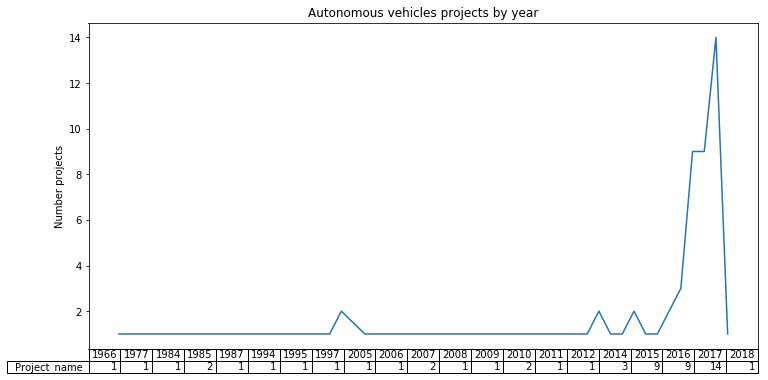

In [43]:
f, ax = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(12,6))
ax = df.groupby('Year_Start')['Project_name'].nunique().plot(kind='line', table=True)
ax.axes.get_xaxis().set_visible(False)
plt.title('Autonomous vehicles projects by year')
plt.ylabel('Number projects')
plt.show()


In [44]:
# Count projects by Sponsor
df1 = df.groupby(['Sponsor'])['Project_name'].nunique()
df1= pd.DataFrame(df1)
df1.head()

,Project_name
Sponsor,
Amazon,2
Apple,1
Audi,1
Autoliv,1
Autotalks,1


In [45]:
# Rename columns
df1.columns = ['Num_Projects']
df1.head()

,Num_Projects
Sponsor,
Amazon,2
Apple,1
Audi,1
Autoliv,1
Autotalks,1


In [46]:
# Sort table
df1 = df1.sort_values(by=['Num_Projects'],ascending=False)

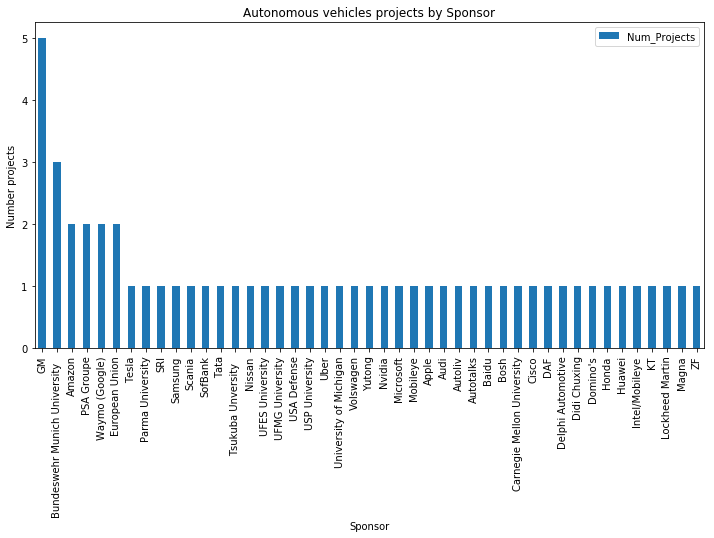

In [47]:
# Plot Graphic
f, ax = plt.subplots(ncols=1, sharex=True, sharey=True, figsize=(12,6))
ax = df1.plot(ax = ax, kind='bar', table=False)
ax.axes.get_xaxis().set_visible(True)
plt.title('Autonomous vehicles projects by Sponsor')
plt.ylabel('Number projects')
plt.show()

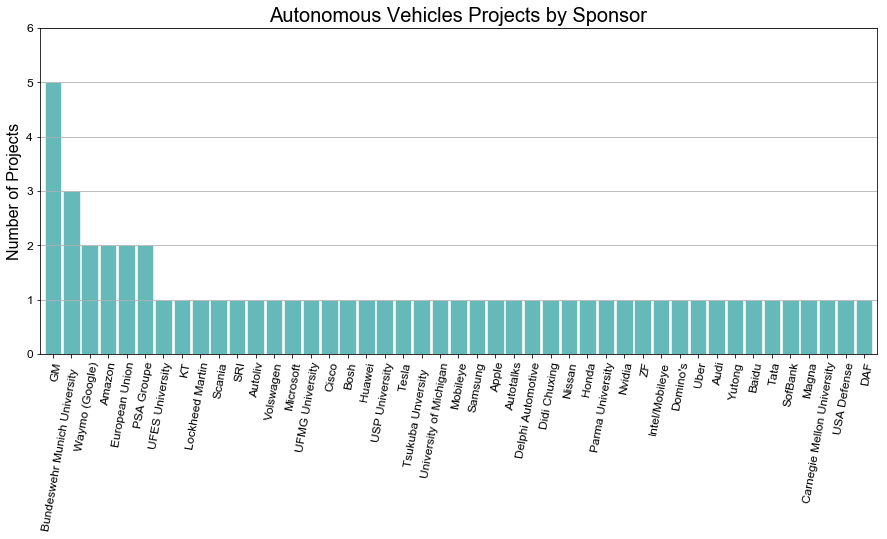

In [48]:
# plot a histogram of the countries  
countdata = df['Sponsor'].value_counts()
ax = countdata.plot(kind='bar',                 
                    figsize=[15, 6], 
                    width=0.9, 
                    alpha=0.6, 
                    color='darkcyan',
                    edgecolor='w',
                    grid=False,
                    ylim=[0, 6])

ax.set_xticks(range(len(countdata)))
ax.set_xticklabels(countdata.index, rotation=80, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Autonomous Vehicles Projects by Sponsor', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of Projects', fontproperties=label_font)

plt.show()